In [118]:
import pandas as pd
import numpy as np
import sklearn as sk
import openpyxl
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt 
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestRegressor
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import warnings
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits


warnings.simplefilter("ignore")

In [70]:
matriz_1_seleccionada_b = pd.read_excel('/home/erick_castro/Documentos/Inteligencia/matriz_1_seleccionada_b.xlsx', sheet_name = "Sheet1")
Qmax = pd.read_excel('/home/erick_castro/Documentos/Inteligencia/Qmax.xlsx', sheet_name = "Sheet1")

In [71]:
X,y=matriz_1_seleccionada_b,Qmax
print(X.shape)
print(y.shape)

(215, 3)
(215, 1)


In [104]:
X_train,X_test, y_train,y_test = train_test_split(X,y, random_state=1)

In [105]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [106]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 0.28965181494610615
Test score: 0.34014326865375566


In [107]:
kn = KNeighborsRegressor()
kn.fit(X_train, y_train)

KNeighborsRegressor()

In [108]:
train_score=kn.score(X_train, y_train)
test_score=kn.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 0.5870348600345492
Test score: 0.4086024197957683


In [109]:
lc = learning_curve(KNeighborsRegressor(n_neighbors=5),X_train,y_train,cv=5)
samples, train, test = lc[0], lc[1], lc[2]
lc

(array([ 12,  41,  70,  99, 128]),
 array([[0.24573195, 0.01880332, 0.01880332, 0.01880332, 0.01880332],
        [0.38039347, 0.50776079, 0.48377821, 0.48377821, 0.48377821],
        [0.40323765, 0.45831982, 0.38467867, 0.4025714 , 0.4025714 ],
        [0.57518845, 0.40438965, 0.58311732, 0.42088931, 0.41612172],
        [0.57884063, 0.43220762, 0.58778738, 0.44853393, 0.59565484]]),
 array([[-0.70449127, -0.05051367, -1.29921678, -0.01626511, -0.02973048],
        [ 0.23075263, -0.09593721, -0.38183469, -0.05935448,  0.22644502],
        [ 0.30613973, -0.06583822, -0.27959271,  0.19021871,  0.29540288],
        [-0.25661851,  0.33629865, -0.3873393 ,  0.20926602,  0.33445393],
        [-0.3664205 ,  0.34610156, -0.20463281,  0.25017562,  0.38051106]]))

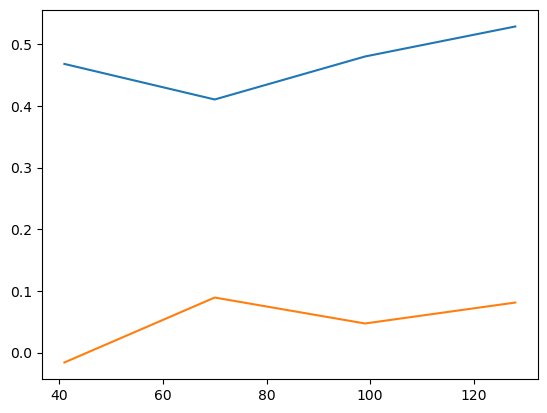

In [96]:
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:]);

In [110]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit

In [115]:
estimator = GaussianNB()
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(estimator, X,y, cv=cv, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 1))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/utils/validation.py

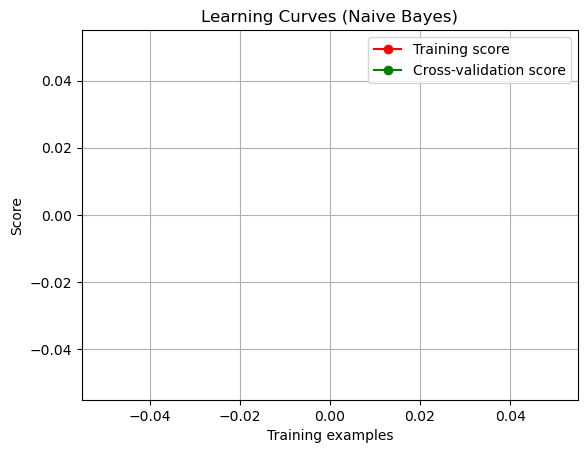

In [117]:
plt.figure()
plt.title("Learning Curves (Naive Bayes)")    
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.9,color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.9, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best");

In [101]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/erick_castro/anaconda3/en

In [83]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

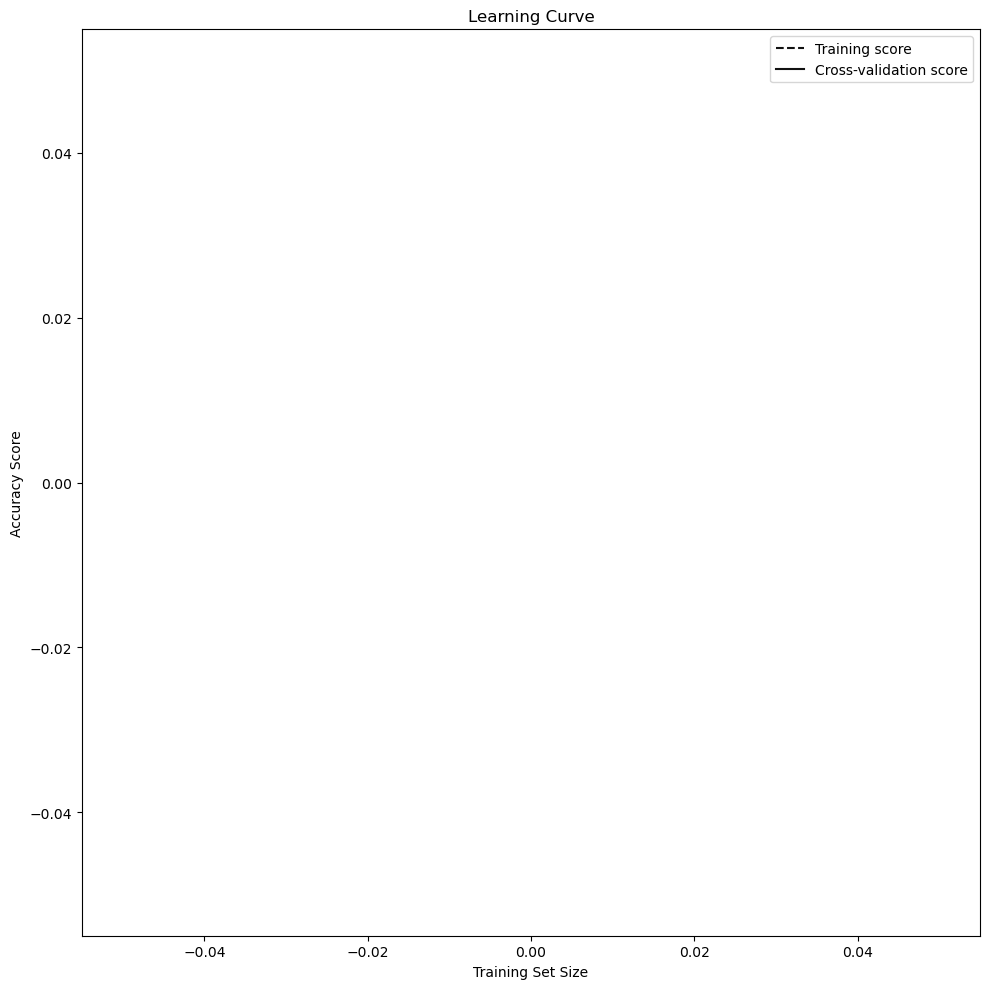

In [84]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/erick_castro/anaconda3/en

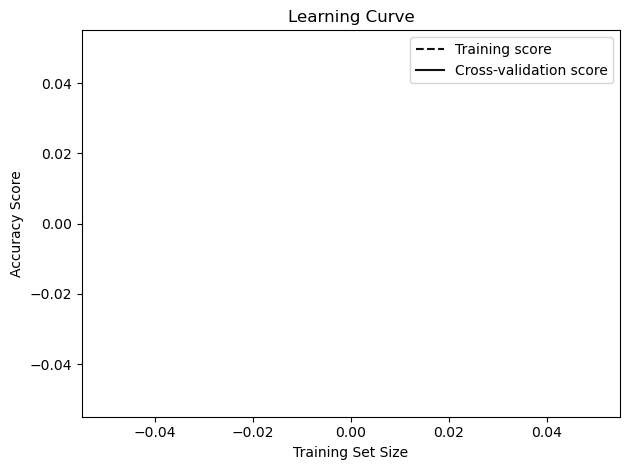

In [119]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y,cv=10, scoring='accuracy', n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()